In [1]:
from torchvision import datasets, transforms
from utils import dataset_loader, plot_loss_accuracy, evaluate_model, plot_grid_view, plot_cmatrix_creport
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
    print(device)

cpu


In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*30*30, 128)
        self.fc2 = nn.Linear(128, 8)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x =self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*30*30)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [3]:
def train_cnn(criterion, optimizer, net, epochs_no, device, train_loader, val_loader):
    epochs = epochs_no

    epoch_log = []
    loss_log = []
    accuracy_log = []

    for epoch in range(epochs):
        print(f'Starting Epoch: {epoch+1}...')
        
        running_loss = 0.0
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if i % 50 ==49:
                correct = 0
                total = 0
                
                with torch.no_grad():
                    for data in val_loader:
                        images, labels = data
                        images = images.to(device)
                        labels = labels.to(device)
                        
                        outputs = net(images)
                        
                        _, predicted = torch.max(outputs.data, dim=1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                        
                    accuracy = 100 * correct / total
                    epoch_num = epoch + 1
                    actual_loss = running_loss / 50
                    print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i +1)}, loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                    running_loss = 0.0
                
        epoch_log.append(epoch_num)
        loss_log.append(actual_loss)
        accuracy_log.append(accuracy)
        
    print('Finished Training')
    return epoch_log, loss_log, accuracy_log
        

In [4]:
dataset_dir = 'output'
batch_size = 128

# Apply transformations
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Initiate dataloaders
dataset, train_loader, val_loader, test_loader = dataset_loader(
    dataset_dir, transform, batch_size=batch_size
)

In [33]:
# Hyperparameters
lr = 0.003
epochs_no = 20

# Create an instance of the model
net = Net()
net.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr= lr)

# Training..
epoch_log, loss_log, accuracy_log = train_cnn(criterion, optimizer, net, epochs_no, device, train_loader, val_loader)

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, loss: 1.533, Test Accuracy = 65.580%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, loss: 0.757, Test Accuracy = 71.450%
Starting Epoch: 3...
Epoch: 3, Mini-Batches Completed: 50, loss: 0.600, Test Accuracy = 74.109%
Starting Epoch: 4...
Epoch: 4, Mini-Batches Completed: 50, loss: 0.471, Test Accuracy = 76.066%
Starting Epoch: 5...
Epoch: 5, Mini-Batches Completed: 50, loss: 0.369, Test Accuracy = 76.116%
Starting Epoch: 6...
Epoch: 6, Mini-Batches Completed: 50, loss: 0.335, Test Accuracy = 77.220%
Starting Epoch: 7...
Epoch: 7, Mini-Batches Completed: 50, loss: 0.250, Test Accuracy = 75.615%
Starting Epoch: 8...
Epoch: 8, Mini-Batches Completed: 50, loss: 0.190, Test Accuracy = 77.020%
Starting Epoch: 9...
Epoch: 9, Mini-Batches Completed: 50, loss: 0.108, Test Accuracy = 76.618%
Starting Epoch: 10...
Epoch: 10, Mini-Batches Completed: 50, loss: 0.103, Test Accuracy = 77.321%
Starting Epoch: 11...
Epoch: 11, Mini-

In [35]:
# Save model
PATH = './models/net_all_operations.pth'
torch.save(net.state_dict(), PATH)

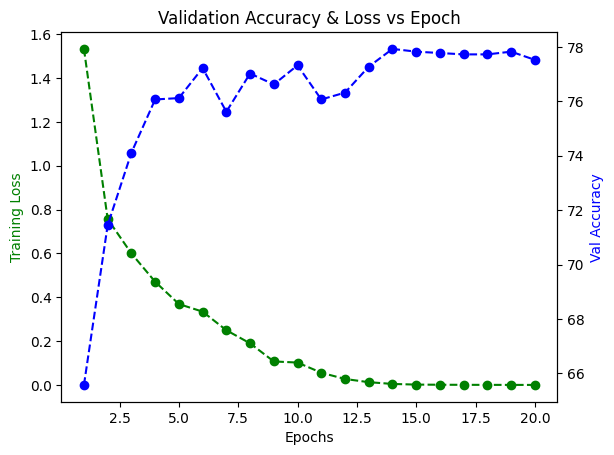

In [36]:
# Plot loss and accuracy
plot_loss_accuracy(epoch_log, loss_log, accuracy_log)

In [37]:
# Evalaute on test set
evaluate_model(test_loader,net)

'Test Accuracy: 78.056%'

In [7]:
dataset_dir = 'output_versions\mnist_rot_only'
batch_size = 128

# Apply transformations
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Initiate dataloaders
dataset, train_loader, val_loader, test_loader = dataset_loader(
    dataset_dir, transform, batch_size=batch_size
)

In [42]:
# Hyperparameters
lr = 0.003
epochs_no = 20

# Create an instance of the model
net = Net()
net.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr= lr)

# Training..
epoch_log, loss_log, accuracy_log = train_cnn(criterion, optimizer, net, epochs_no, device, train_loader, val_loader)

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, loss: 1.336, Test Accuracy = 71.952%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, loss: 0.597, Test Accuracy = 76.267%
Starting Epoch: 3...
Epoch: 3, Mini-Batches Completed: 50, loss: 0.451, Test Accuracy = 79.227%
Starting Epoch: 4...
Epoch: 4, Mini-Batches Completed: 50, loss: 0.345, Test Accuracy = 81.937%
Starting Epoch: 5...
Epoch: 5, Mini-Batches Completed: 50, loss: 0.258, Test Accuracy = 80.933%
Starting Epoch: 6...
Epoch: 6, Mini-Batches Completed: 50, loss: 0.182, Test Accuracy = 81.887%
Starting Epoch: 7...
Epoch: 7, Mini-Batches Completed: 50, loss: 0.127, Test Accuracy = 81.034%
Starting Epoch: 8...
Epoch: 8, Mini-Batches Completed: 50, loss: 0.070, Test Accuracy = 81.435%
Starting Epoch: 9...
Epoch: 9, Mini-Batches Completed: 50, loss: 0.061, Test Accuracy = 80.883%
Starting Epoch: 10...
Epoch: 10, Mini-Batches Completed: 50, loss: 0.033, Test Accuracy = 81.435%
Starting Epoch: 11...
Epoch: 11, Mini-

In [43]:
# Save model
PATH = './models/net_crop_only.pth'
torch.save(net.state_dict(), PATH)

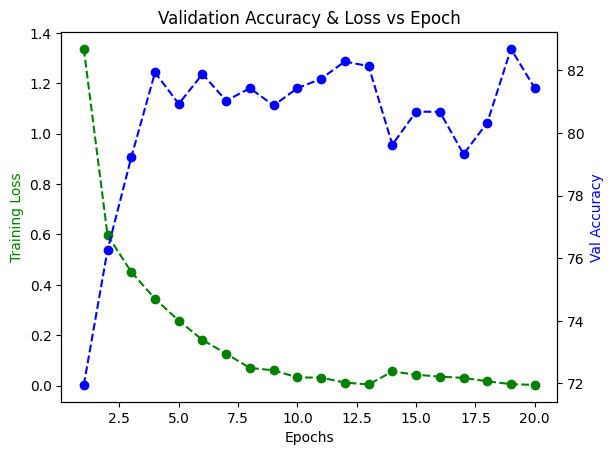

In [44]:
# Plot loss and accuracy
plot_loss_accuracy(epoch_log, loss_log, accuracy_log)

In [45]:
# Evalaute on test set
evaluate_model(test_loader,net)

'Test Accuracy: 82.866%'

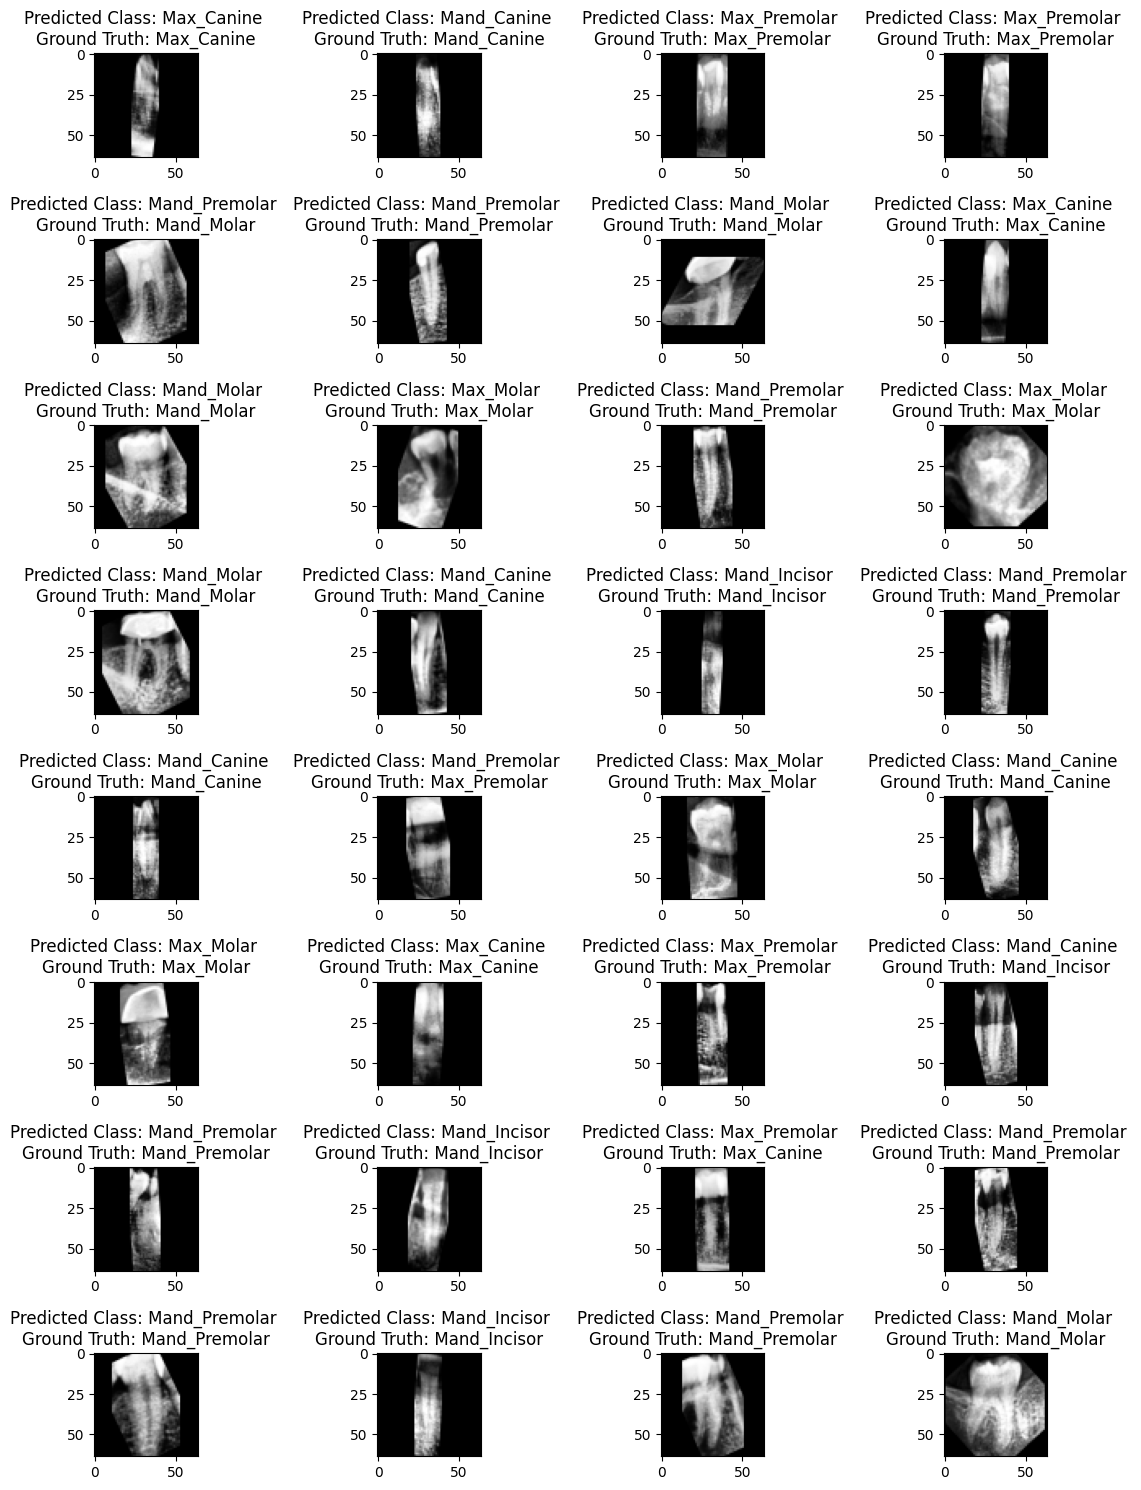

In [46]:
plot_grid_view(dataset, net, test_loader)

In [10]:
# Load a trained model
net = Net()
net.to(device)
net.load_state_dict(torch.load(r'.\models\net_rotate_only.pth'))

<All keys matched successfully>

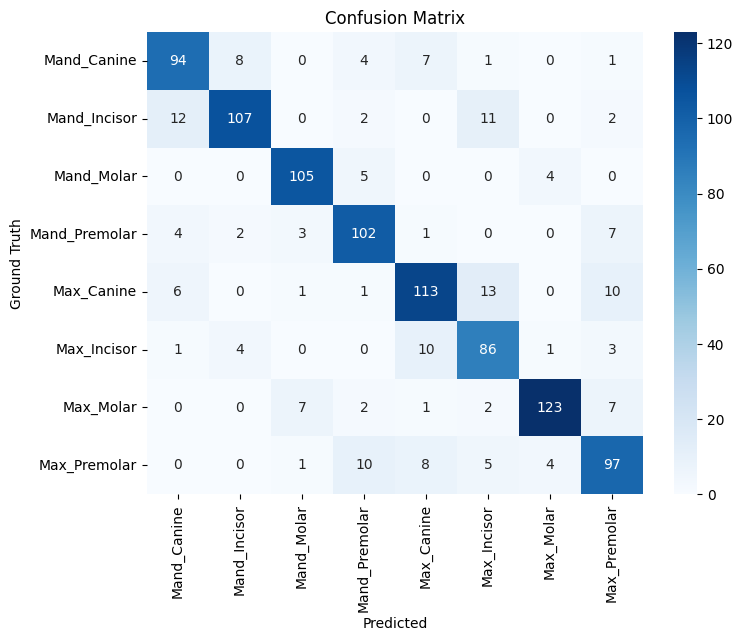

               precision    recall  f1-score   support

  Mand_Canine       0.80      0.82      0.81       115
 Mand_Incisor       0.88      0.80      0.84       134
   Mand_Molar       0.90      0.92      0.91       114
Mand_Premolar       0.81      0.86      0.83       119
   Max_Canine       0.81      0.78      0.80       144
  Max_Incisor       0.73      0.82      0.77       105
    Max_Molar       0.93      0.87      0.90       142
 Max_Premolar       0.76      0.78      0.77       125

     accuracy                           0.83       998
    macro avg       0.83      0.83      0.83       998
 weighted avg       0.83      0.83      0.83       998



In [6]:
plot_cmatrix_creport(test_loader, net, dataset)